In [1]:
# we import some initial necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [3]:
# imported our functions
import sys
sys.path.append("Functions/")
import functions as func

##### Heart Risk Dataset

In [4]:
# we import the heart risk dataset
hdf = pd.read_csv("model_datasets\heart_risk_data_raw.csv")
hdf.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [5]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(hdf)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
FastingBS,int64,True,918,0,2,0,0.23,0,0.0,0.0,0.0,1,0.42,1.26,-0.4
Oldpeak,float64,True,918,0,53,0.0,0.89,-2.6,0.0,0.6,1.5,6.2,1.07,1.02,1.2
RestingBP,int64,True,918,0,67,120,132.4,0,120.0,130.0,140.0,200,18.51,0.18,3.27
MaxHR,int64,True,918,0,119,150,136.81,60,120.0,138.0,156.0,202,25.46,-0.14,-0.45
Age,int64,True,918,0,50,54,53.51,28,47.0,54.0,60.0,77,9.43,-0.2,-0.39
HeartDisease,int64,True,918,0,2,1,0.55,0,0.0,1.0,1.0,1,0.5,-0.22,-1.96
Cholesterol,int64,True,918,0,222,0,198.8,0,173.25,223.0,267.0,603,109.38,-0.61,0.12
Sex,object,False,918,0,2,M,-,-,-,-,-,-,-,-,-
ExerciseAngina,object,False,918,0,2,N,-,-,-,-,-,-,-,-,-
RestingECG,object,False,918,0,3,Normal,-,-,-,-,-,-,-,-,-


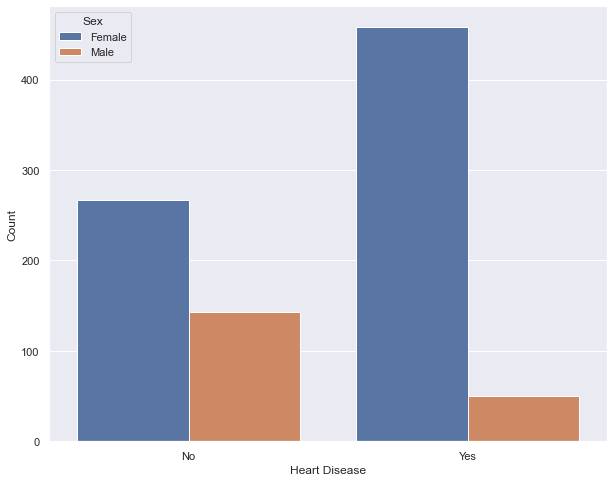

In [6]:
# we plot the feature Sex on a bar graph to visually explore the data
sns.countplot(x=hdf["HeartDisease"].apply(lambda x: "Yes" if x == 1 else "No"), hue = hdf["Sex"])
plt.legend(title='Sex', loc='upper left', labels=['Female', 'Male'])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [7]:
# we create dummies for "Sex" column
hdf["Sex"] = hdf["Sex"].apply(lambda x: 1 if x == "M" else 0)

In [8]:
# we check for a observation with corrupted information on RestingBP
hdf[hdf["RestingBP"] <= 70]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [9]:
# we drop the observation
hdf.drop([449], axis=0, inplace=True)

Mean: 132.54089422028352
Median: 130.0
Mode: 120


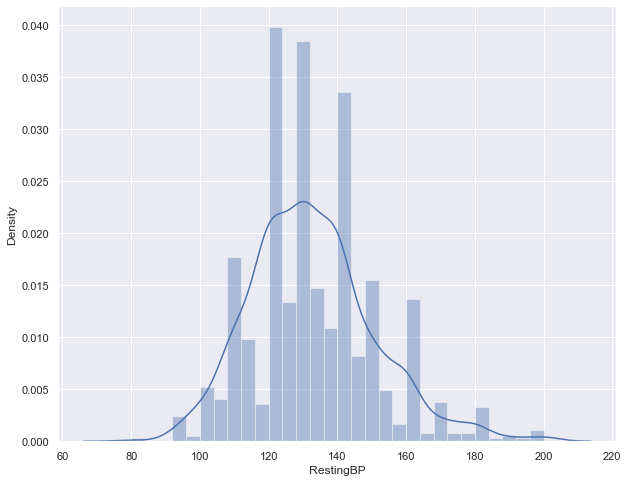

In [10]:
# we detect a discrepency in our main dataset: the feature name provided is RestingBP (Diastolic) but data provided is of (Systolic BP)
print("Mean:", hdf["RestingBP"].mean())
print("Median:", hdf["RestingBP"].median())
print("Mode:", hdf["RestingBP"].mode()[0])
sns.distplot(hdf["RestingBP"])
plt.show()

In [11]:
# we create a column to classify hypertension from the blood pressure measurements (we assume as systolic BP)
hdf["hypertension"] = hdf["RestingBP"].apply(lambda x: 1 if x >= 140 else 0)

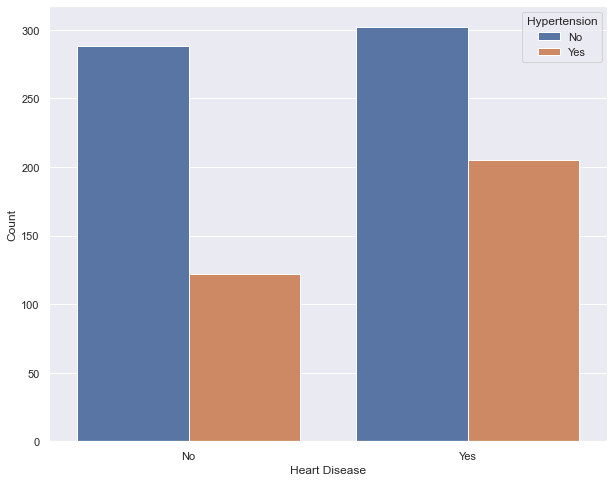

In [12]:
# we plot the engineered feature Hypertension on a bar graph to visually explore the data
sns.countplot(x=hdf["HeartDisease"].apply(lambda x: "Yes" if x == 1 else "No"), hue = hdf["hypertension"])
plt.legend(title='Hypertension', loc='upper right', labels=['No', 'Yes'])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

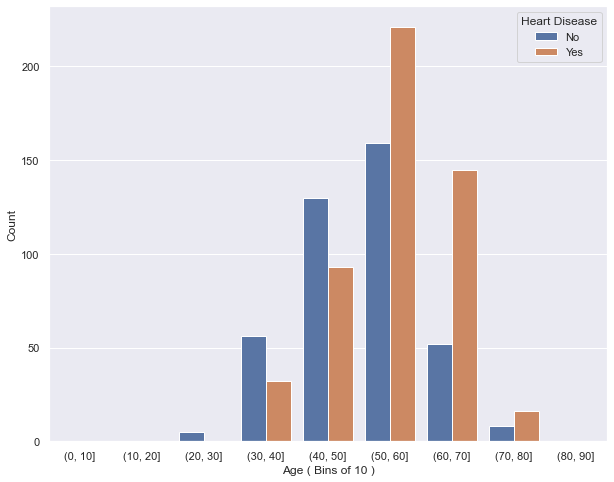

In [13]:
# we plot the age bins on a bar graph to visually explore the data in the feature
hdf["Age_bins"] = pd.cut(hdf["Age"], bins=[0,10,20,30,40,50,60,70,80,90])
sns.countplot(x=hdf["Age_bins"], hue=hdf["HeartDisease"])
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.xlabel("Age ( Bins of 10 )")
plt.ylabel("Count")
plt.show()

In [14]:
# we keep a note that our model is being only trained for people of range 30 to 80 years of age

In [15]:
# we drop the features that we dont have information to in our assam health survey dataset
hdf.drop(["ChestPainType", "Cholesterol", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "RestingBP", "Age_bins"], axis=1, inplace=True)

In [16]:
# we check the correlation of the features among each other
hdf.corr()

,Age,Sex,FastingBS,HeartDisease,hypertension
Age,1.000000,0.055670,0.198170,0.282012,0.226031
Sex,0.055670,1.000000,0.120424,0.305118,0.043693
FastingBS,0.198170,0.120424,1.000000,0.267994,0.052146
HeartDisease,0.282012,0.305118,0.267994,1.000000,0.110836
hypertension,0.226031,0.043693,0.052146,0.110836,1.000000


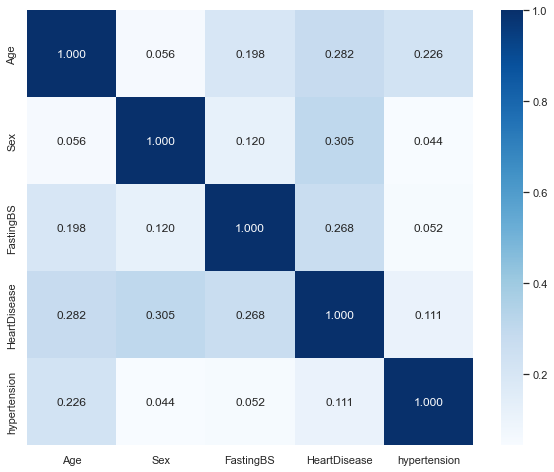

In [17]:
# we plot the correlation on a heatmap for better understanding
sns.heatmap(hdf.corr(), annot=True, fmt=".3f", cmap="Blues")
plt.show()

In [18]:
# we import the required Machine Learning libraries to build our Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
# we scale our dataset for ML model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hdf.drop(columns=["HeartDisease"]))
y = hdf["HeartDisease"]

In [20]:
# we split and create the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=45)

In [21]:
# we fit the data on our classifier with default hyper parameters and evaluate the scores
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(classification_report(y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59        82
           1       0.68      0.79      0.73       102

    accuracy                           0.67       184
   macro avg       0.67      0.66      0.66       184
weighted avg       0.67      0.67      0.67       184



In [22]:
# we run a For-Loop to find optimal number of Neighbors for our KNN Classifier
counter = []
testlist = []
for i in range(1, len(X_train)):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    testlist.append(knn_model.score(X_test, y_test))
    counter.append(i)
testdict = dict(zip(counter, testlist))

1 Max Accuracy Score= 0.7391304347826086 
Number of Neighbors= 16
2 Max Accuracy Score= 0.7391304347826086 
Number of Neighbors= 18


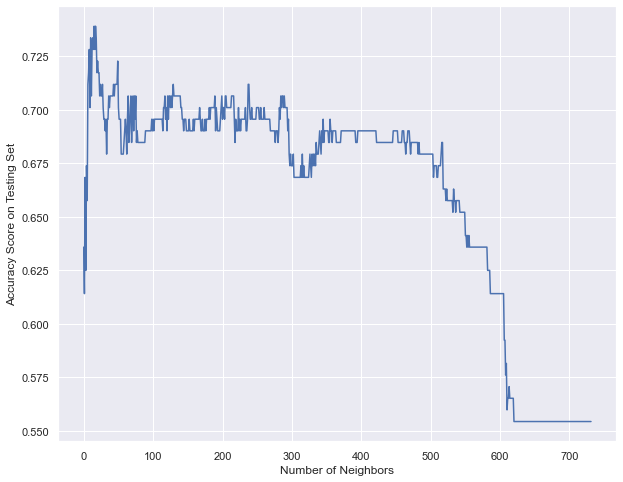

In [23]:
# we plot the results and run a simple for-loop to find the no of neighbors of the max accuracy score
plt.plot(testdict.values())
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score on Testing Set");

count = 0
for key, value in testdict.items():
         if max(testdict.values()) == value:
             count += 1
             print(str(count), "Max Accuracy Score=",value,"\nNumber of Neighbors=",key)

In [24]:
# we fit the knn model with optimal neighbors and evaluate performance
knn_model= KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train, y_train)
y_pred= knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66        82
           1       0.72      0.87      0.79       102

    accuracy                           0.74       184
   macro avg       0.75      0.72      0.72       184
weighted avg       0.75      0.74      0.73       184



In [25]:
# we see significant improvement in performance especially in recall so we save this classifier to use later while making stroke risk classifier
heart_model= KNeighborsClassifier(n_neighbors=18)
heart_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=18)

##### Stroke Risk Dataset

In [26]:
# we import the heart risk dataset
sdf = pd.read_csv("model_datasets\stroke_risk_data_raw.csv")
sdf.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [27]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(sdf)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
stroke,int64,True,43400,0,2,0,0.02,0,0.0,0.0,0.0,1,0.13,7.24,50.45
heart_disease,int64,True,43400,0,2,0,0.05,0,0.0,0.0,0.0,1,0.21,4.25,16.1
hypertension,int64,True,43400,0,2,0,0.09,0,0.0,0.0,0.0,1,0.29,2.79,5.79
avg_glucose_level,float64,True,43400,0,12543,82.71,104.48,55.0,77.54,91.58,112.07,291.05,43.11,1.68,2.18
bmi,float64,True,41938,1462,555,27.7,28.61,10.1,23.2,27.7,32.9,97.6,7.77,0.9,1.99
id,int64,True,43400,0,43400,1,36326.14,1,18038.5,36351.5,54514.25,72943,21072.13,0.0,-1.2
age,float64,True,43400,0,104,51.0,42.22,0.08,24.0,44.0,60.0,82.0,22.52,-0.1,-1.0
ever_married,object,False,43400,0,2,Yes,-,-,-,-,-,-,-,-,-
Residence_type,object,False,43400,0,2,Urban,-,-,-,-,-,-,-,-,-
gender,object,False,43400,0,3,Female,-,-,-,-,-,-,-,-,-


In [28]:
# we see that we have an extremely imbalanced dataset
vcount = sdf.stroke.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
print("Proportion of Minority Class:", str(np.round((vcount[1] / (vcount[0] + vcount[1]))*100, 2)) + " percent")

Observations of Class 0: 42617
Observations of Class 1: 783
Proportion of Minority Class: 1.8 percent


In [29]:
# we limit age range to 30 to 80 year old as that is where our Heart Risk Classifier model is trained on (Read note above in Heart Risk Dataset)
sdf = sdf[(sdf["age"] >= 30) & (sdf["age"] <= 80)]

In [30]:
# we fill null values in bmi with mean of the individual groups
stroke_group_bmi_mean = sdf[sdf["stroke"] == 1].bmi.mean()
non_stroke_group_bmi_mean = sdf[sdf["stroke"] == 0].bmi.mean()
sdf.loc[(sdf["stroke"] == 1) & (sdf["bmi"].isna()), "bmi"] = stroke_group_bmi_mean
sdf.loc[(sdf["stroke"] == 0) & (sdf["bmi"].isna()), "bmi"] = non_stroke_group_bmi_mean

In [31]:
# we drop "Other" category of gender rows from dataset as our model is not trained for that category
to_drop = list(sdf[sdf["gender"]=="Other"].index)
sdf.drop(to_drop, axis=0, inplace=True)

In [32]:
# we create dummies and save them back
sdf["gender"] = sdf["gender"].apply(lambda x: 1 if x == "Male" else 0)
sdf["ever_married"] = sdf["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)
sdf["Residence_type"] = sdf["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)

In [33]:
# we create a column to classify high blood sugar from average glucose level
sdf["high_blood_sugar"] = sdf["avg_glucose_level"].apply(lambda x: 1 if x >= 140 else 0)
# Avg blood sugar range for adults is 100-180 mg/dL so we take the avg(140) and classify anyone higher as 1 else 0.
# (source: https://www.singlecare.com/blog/normal-blood-glucose-levels/)

In [34]:
# we drop the features with redundant data or if we dont have that information in our assam health survey dataset
sdf.drop(["smoking_status", "work_type", "heart_disease"], axis=1, inplace=True)

In [35]:
# we prepare a dataset to feed into our Heart Disease Risk Classifier Model
testdf = sdf[["age", "gender", "high_blood_sugar", "hypertension"]]
testdf.columns = ["Age","Sex","FastingBS","hypertension"]

In [36]:
# we use our Heart Risk classifier scaler to transform our testdf
tdf_scaled = scaler.transform(testdf)

In [37]:
# we predict with the heart risk classifier and merge the prediction to main dataframe
pred = heart_model.predict(tdf_scaled)
sdf["high_risk_heart_disease"] = pred

In [38]:
# we check the correlation of the features with our target variable
sdf.corrwith(sdf["stroke"]).sort_values(ascending=False)

stroke                     1.000000
age                        0.147273
avg_glucose_level          0.070901
high_blood_sugar           0.070342
high_risk_heart_disease    0.066270
hypertension               0.055606
gender                     0.015528
ever_married               0.008671
Residence_type             0.002698
id                         0.002211
bmi                       -0.011013
dtype: float64

In [39]:
# we drop non relevant columns
sdf.drop(["avg_glucose_level", "id"], axis=1, inplace=True)

In [40]:
# we see that our dataset is extremely imbalanced so we will try to apply SMOTE to balance our dataset before fitting to model
vcount = sdf.stroke.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
print("Proportion of Minority Class:", str(np.round((vcount[1] / (vcount[0] + vcount[1]))*100, 2)) + " percent")

Observations of Class 0: 28094
Observations of Class 1: 700
Proportion of Minority Class: 2.43 percent


In [41]:
# we import the required libraries for our ML process
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [42]:
# we scale our dataset for ML model
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(sdf.drop(columns=["stroke"]))
y = sdf["stroke"]

In [43]:
# we split and create the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=45, stratify=y)

In [44]:
# we apply SMOTE to balance our training set and we see that we have now a balanced number of observations from each class
sm = SMOTE(random_state=45, k_neighbors=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
y_res.value_counts()
vcount = y_res.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
print("Proportion of Minority Class:", str(np.round((vcount[1] / (vcount[0] + vcount[1]))*100, 2)) + " percent")

Observations of Class 0: 22475
Observations of Class 1: 22475
Proportion of Minority Class: 50.0 percent


In [45]:
# we fit the data on a base model and evaluate performance
lr_model = LogisticRegression()
lr_model.fit(X_res, y_res)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      5619
           1       0.06      0.75      0.10       140

    accuracy                           0.69      5759
   macro avg       0.52      0.72      0.46      5759
weighted avg       0.97      0.69      0.79      5759



In [46]:
# we perform a grid search to find optimal solver and C values
parameters = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "C" : [1.0, 0.5, 0.1]
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=LogisticRegression(penalty='l2'), param_grid=parameters, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
clf.fit(X_res, y_res)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 0.5, 0.1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [47]:
clf.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [48]:
# we print out a classification report and evaluate detection rate ( recall )
clf.best_estimator_.fit(X_res, y_res)
print(classification_report(y_test, clf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      5619
           1       0.06      0.75      0.10       140

    accuracy                           0.69      5759
   macro avg       0.52      0.72      0.46      5759
weighted avg       0.97      0.69      0.79      5759



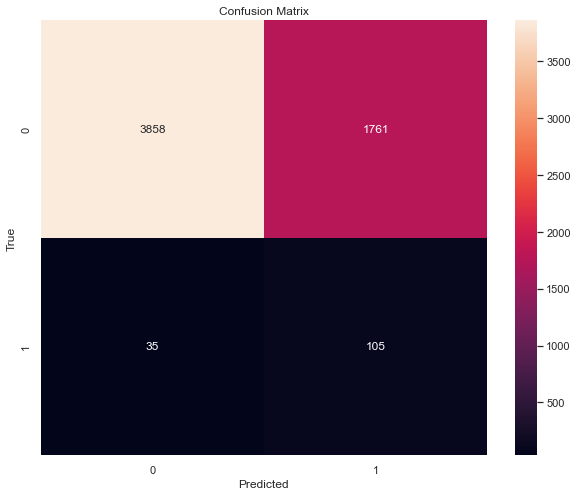

In [49]:
# we plot a confusion matrix to evaluate visually
ax = sns.heatmap(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), annot=True, fmt="d")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

In [50]:
# we see satisfactory performance of our classifier especially in recall(detection) so we save this classifier to use later while working on Assam Health Survey Dataset
stroke_model = clf.best_estimator_
stroke_model.fit(X_res, y_res)

LogisticRegression(C=0.1, solver='liblinear')

##### Assam Health Survey Dataset

In [51]:
# we search for all csv files of each districts from the folder and concat them together into one dataframe
import glob
import os
path = "districts_health_survey_raw"
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df.sample(5)

,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,day_or_mn_for_breast_feeding_cd,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type
120846,ASSAM,NORTH CACHAR HILLS,Urban,Urban,1051832,37,3,23-07-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29634,ASSAM,DHEMAJI,Rural,200<population<2000,1137004,241,1,30-11-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58733,ASSAM,HAILAKANDI,Rural,200<population<2000,1069779,107,1,17-08-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26299,ASSAM,DHEMAJI,Urban,Urban,1138208,23,3,13-09-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81170,ASSAM,KARBI ANGLONG,Rural,population>=2000,1045163,401,1,28-06-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(df)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
sl_no,int64,True,142838,0,30,1,3.1,0,2.0,3.0,4.0,999,3.28,197.67,59812.87
Weight_in_kg,float64,True,117163,25675,1027,50.099998,42.58,0.5,32.099998,46.200001,53.700001,6602.0,25.39,147.04,37996.71
illness_duration,float64,True,1037,141801,18,2.0,2.96,0.0,0.0,2.0,3.0,365.0,12.11,26.76,780.8
identification_code,float64,True,142592,246,4573,2.0,991.58,0.0,322.0,711.0,1247.0,99999.0,2888.68,24.78,693.32
house_hold_no,int64,True,142838,0,57,1,1.3,0,1.0,1.0,1.0,99,2.0,21.19,637.59
ahs_house_unit,int64,True,142838,0,954,1,185.48,1,67.0,148.0,264.0,9111,169.7,8.22,322.4
day_or_month_for_breast_feeding,float64,True,4428,138410,29,6.0,4.75,0.0,4.0,5.0,6.0,79.0,2.55,7.64,177.82
fasting_blood_glucose_mg_dl,float64,True,72166,70672,287,98.0,98.31,50.0,90.0,97.0,103.0,400.0,19.34,5.06,48.43
water_month,float64,True,4413,138425,15,6.0,4.86,0.0,4.0,6.0,7.0,73.0,2.69,2.95,92.63
ani_milk_month,float64,True,4412,138426,16,7.0,5.08,0.0,4.0,6.0,7.0,70.0,3.08,1.62,44.44


In [53]:
# we filter by age range of 30 to 80 years as that is where our classification model is trained for ( see note above )
df = df[(df["Age"] >= 30) & (df["Age"] <= 80)]

In [54]:
# we filter out all rows that doesn't have the features that we need for classification
df = df[(df["Weight_in_kg"].notnull()) & (df["Length_height_cm"].notnull())  & (df["BP_systolic"].notnull())  & (df["fasting_blood_glucose_mg_dl"].notnull())]

In [55]:
# we create dummies for "Sex" column
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "Male" else 0)

In [56]:
# we create a main column for bp sys reading and take avg of the two readings if both are available or else we take only the 1st reading if 2nd reading is missing
df["BP_systolic_2_reading"].fillna("1", inplace=True)
df["BP_systolic_2_reading"] = df["BP_systolic_2_reading"].astype("int")
df["bp_sys_main"] = df.apply(lambda x: x["BP_systolic"] if x["BP_systolic_2_reading"] == 1 else ((x["BP_systolic"])+(x["BP_systolic_2_reading"]))/2 , axis=1)

In [57]:
# we create a column to classify hypertension from blood pressure measurements
df["hypertension"] = df["bp_sys_main"].apply(lambda x: 1 if x >= 140 else 0)

In [58]:
# we fill null values in marital status with never married
df["Marital_status"].fillna("Never married", inplace=True)

In [59]:
# we create a column to classify if the respondent ever married
df["ever_married"] = df.apply(lambda x: 0 if (("Never married" in x["Marital_status"]) | ("Not Stated" in x["Marital_status"])) else 1, axis=1)

In [60]:
# we create dummies for "rural_urban" column
df["rural_urban"] = df["rural_urban"].apply(lambda x: 1 if x == "Urban" else 0)

In [61]:
# we filter out outliers in our weights column that can affect our model performance
df = df[(df["Weight_in_kg"] >= df["Weight_in_kg"].quantile(0.01)) & (df["Weight_in_kg"] <= df["Weight_in_kg"].quantile(0.99999))]

In [62]:
# we filter out the outliers from our heights column
df = df[(df["Length_height_cm"] >= df["Length_height_cm"].quantile(0.0003)) & (df["Length_height_cm"] <= df["Length_height_cm"].quantile(0.9999))]

In [63]:
# we detect some discrepencies in some observations with regards to weight and height ( errors while data collection )
df.loc[[56672, 98636, 125074]]

,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,bp_sys_main,hypertension,ever_married
56672,ASSAM,GOLAGHAT,0,population>=2000,1035977,399,1,03-09-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.5,0,0
98636,ASSAM,LAKHIMPUR,0,population>=2000,1136149,230,1,21-12-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.5,0,0
125074,ASSAM,NORTH CACHAR HILLS,1,Urban,1053590,275,1,08-07-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.5,1,0


In [64]:
# we remove the observations with the discrepencies
df.drop([56672, 98636, 125074], axis=0, inplace=True)

In [65]:
# we create a BMI (Body Mass Index) feature from weight and height
df["bmi"] = df.apply(lambda x: (x["Weight_in_kg"] / (x["Length_height_cm"] / 100)), axis=1)

In [66]:
# we detect some bmi outliers that can affect model performance and remove them
df = df[df["bmi"] < 95]

In [67]:
# we create high blood sugar binary classifier in accordance with our stroke classifier model
df["high_blood_sugar"] = df["fasting_blood_glucose_mg_dl"].apply(lambda x: 1 if x >= 120 else 0)

In [68]:
# we prepare a dataset to feed into our Heart Disease Risk Classifier ML Model
testdf = df[["Age", "Sex", "high_blood_sugar", "hypertension"]]
testdf.columns = ["Age","Sex","FastingBS","hypertension"] # renamed the columns for the scaler transformation

In [69]:
# we use the scaler from Heart Disease Risk Classifier and scale our dataset
tdf_scaled = scaler.transform(testdf)

In [70]:
# we predict with the heart risk classifier and merge the prediction to main dataframe
pred = heart_model.predict(tdf_scaled)
df["high_risk_heart_disease"] = pred

In [71]:
# we prepare our dataset to feed into our Stroke Risk Classifier ML Model
df1 = df[["Sex", "Age", "hypertension", "ever_married", "rural_urban", "bmi", "high_blood_sugar", "high_risk_heart_disease"]]
df1.columns = ["gender","age","hypertension","ever_married","Residence_type","bmi","high_blood_sugar","high_risk_heart_disease"] # renamed the columns for the scaler transformation

In [72]:
# we use the scaler from Stroke Risk Classifier and scale our dataset
df1_scaled = scaler1.transform(df1)

In [73]:
# we predict with the probability with stroke risk classifier and merge anyone over 60% probability to main dataframe as high risk
c = []
for i in stroke_model.predict_proba(df1_scaled):
    if i[1] >= 0.6:
        c.append(1)
    else:
        c.append(0)
df["stroke"] = c
vcount = df.stroke.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
    

Observations of Class 0: 42481
Observations of Class 1: 6508


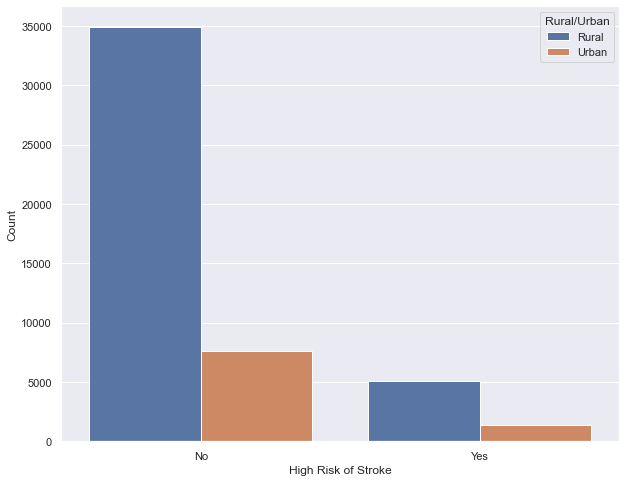

In [78]:
# we plot the rural or urban feature on the basis of stroke group on a bar graph
sns.countplot(x=df["stroke"].apply(lambda x: "Yes" if x == 1 else "No"), hue = df["rural_urban"])
plt.legend(title="Rural/Urban", loc="upper right", labels=["Rural", "Urban"])
plt.xlabel("High Risk of Stroke")
plt.ylabel("Count")
plt.show()

In [83]:
# we do a t-test to verify if there is any statistical significance
from scipy.stats import ttest_ind

ttest, pvalue = ttest_ind(df[df["rural_urban"] == 0]["stroke"], df[df["rural_urban"] == 1]["stroke"])
print("t-test Result:", np.round(ttest, 3))
print("p-value:", pvalue)

# since p value < 0.05 (alpha) we reject the null hypothesis that there is no sig diff and conclude that there is sig diff

t-test Result: -6.998
p-value: 2.630364143596969e-12


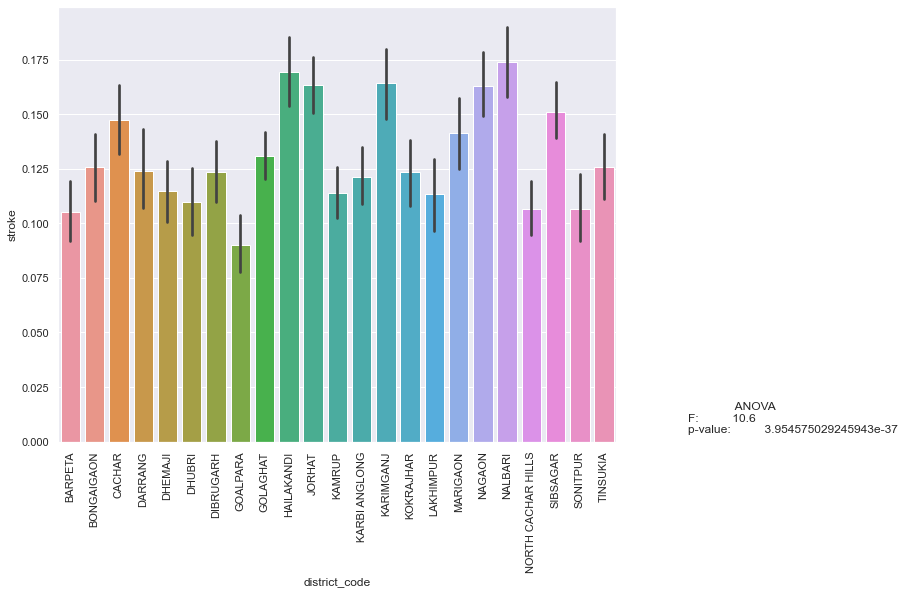

,Stat,+/-,Effect Size,p-value
district_code,F,,10.602,3.954575e-37


In [86]:
# we run our bivarstats function to do a One-Way ANOVA test to verify if there is any statistical significance
func.bivarstats(df[["district_code", "stroke"]], "stroke")
# we see that there is a sig diff in being from diff districts

In [89]:
# we run a tukey hsd test and check top 10 pairs of districts that are most statistically significant
import statsmodels.stats.multicomp as multi 
mc = multi.MultiComparison(df['stroke'], df['district_code'])
Results = mc.tukeyhsd()
tukeydf = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
tukeydf.sort_values("p-adj").head(10)

,group1,group2,meandiff,p-adj,lower,upper,reject
203,KARBI ANGLONG,NALBARI,0.0527,0.001,0.0146,0.0907,True
179,JORHAT,LAKHIMPUR,-0.0499,0.001,-0.0877,-0.0121,True
183,JORHAT,NORTH CACHAR HILLS,-0.0566,0.001,-0.0890,-0.0243,True
185,JORHAT,SONITPUR,-0.0567,0.001,-0.0939,-0.0194,True
112,DHUBRI,NALBARI,0.0639,0.001,0.0235,0.1044,True
111,DHUBRI,NAGAON,0.0531,0.001,0.0141,0.0921,True
188,KAMRUP,KARIMGANJ,0.0503,0.001,0.0143,0.0863,True
107,DHUBRI,KARIMGANJ,0.0542,0.001,0.0136,0.0948,True
104,DHUBRI,JORHAT,0.0534,0.001,0.0163,0.0904,True
103,DHUBRI,HAILAKANDI,0.0594,0.001,0.0189,0.0999,True


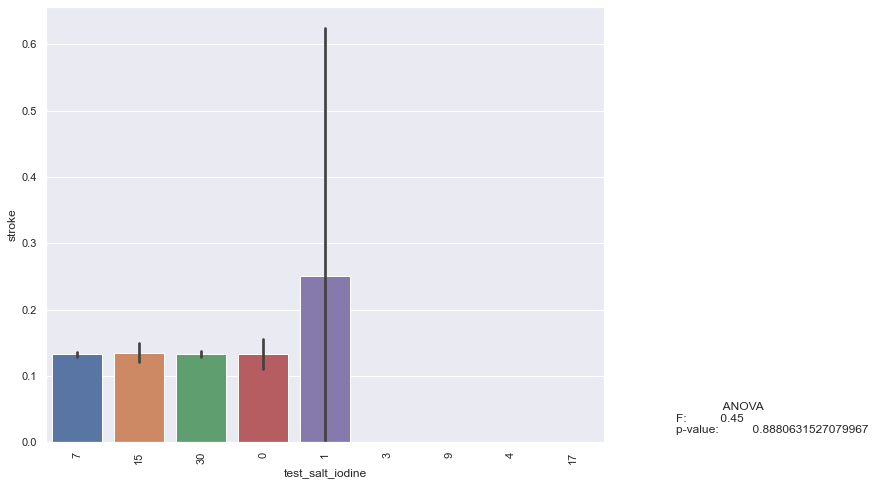

,Stat,+/-,Effect Size,p-value
test_salt_iodine,F,,0.455,0.888063


In [96]:
# we run our bivarstats function to do a One-Way ANOVA test to verify if there is any statistical significance
df["test_salt_iodine"] = df["test_salt_iodine"].astype("str")
func.bivarstats(df[["test_salt_iodine", "stroke"]], "stroke")
# we see that there is no statistical sig diff in having different salt iodine values on stroke risk

In [106]:
# we also run a tukey hsd test to verify significance among pairs
mc = multi.MultiComparison(df['stroke'], df['test_salt_iodine'])
Results = mc.tukeyhsd()
tukeydf = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])

if len(tukeydf[tukeydf["reject"] == True]) == 0:
    print("### Tukey HSD Test Performed ### \nTrue values= 0","\nNo pairs with statistical significance on Target label was found.")

### Tukey HSD Test Performed ### 
True values= 0 
No pairs with statistical significance on Target label was found.


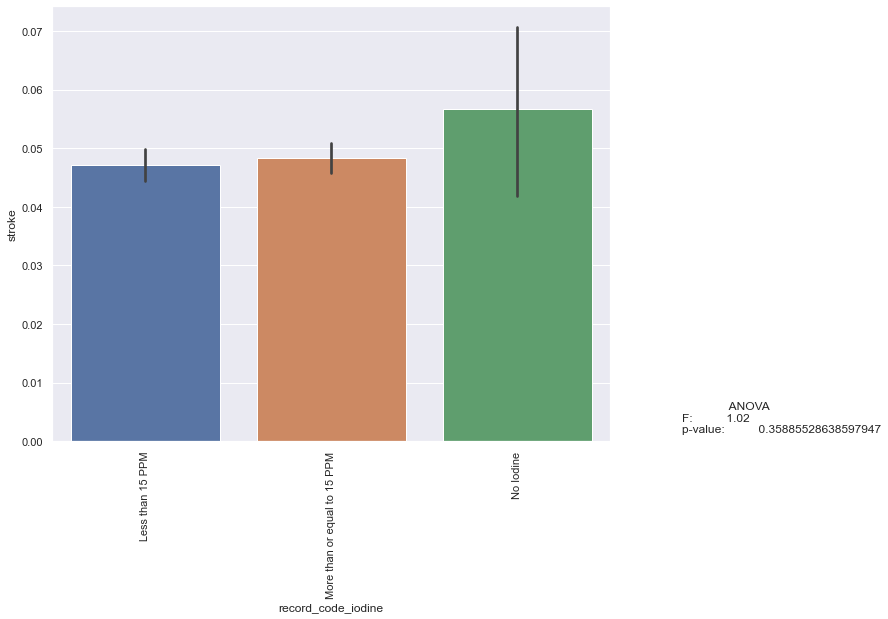

,Stat,+/-,Effect Size,p-value
record_code_iodine,F,,1.025,0.358855


In [447]:
# we run our bivarstats function to do a One-Way ANOVA test to verify if there is any statistical significance
func.bivarstats(df[["record_code_iodine", "stroke"]], "stroke")
# we see that there is no statistical sig diff in having different record code iodine values on stroke risk

In [107]:
# we also run a tukey hsd test to verify significance among pairs
mc = multi.MultiComparison(df['stroke'], df['record_code_iodine'])
Results = mc.tukeyhsd()
tukeydf = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
if len(tukeydf[tukeydf["reject"] == True]) == 0:
    print("### Tukey HSD Test Performed ### \nTrue values= 0","\nNo pairs with statistical significance on Target label was found.")

### Tukey HSD Test Performed ### 
True values= 0 
No pairs with statistical significance on Target label was found.


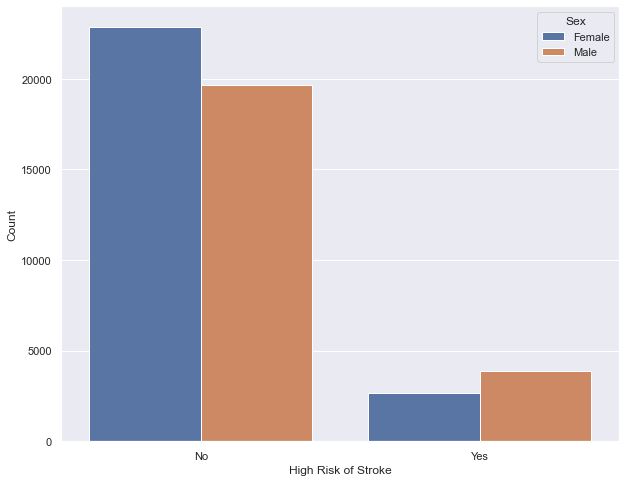

In [110]:
# we plot the sex feature on the basis of stroke group on a bar graph
sns.countplot(x=df["stroke"].apply(lambda x: "Yes" if x == 1 else "No"), hue = df["Sex"])
plt.legend(title="Sex", loc="upper right", labels=["Female", "Male"])
plt.xlabel("High Risk of Stroke")
plt.ylabel("Count")
plt.show()

In [112]:
# we do a t-test to verify if there is any statistical significance
from scipy.stats import ttest_ind

ttest, pvalue = ttest_ind(df[df["Sex"] == 0]["stroke"], df[df["Sex"] == 1]["stroke"])
print("t-test Result:", np.round(ttest, 3))
print("p-value:", pvalue)

# since p value < 0.05 (alpha) we reject the null hypothesis that there is no sig diff and conclude that there is sig diff

t-test Result: -19.878
p-value: 1.3997568200884904e-87


In [120]:
# we do a One-Way ANOVA test to check for statistical significance between haemoglobin level and diff in risk of stroke
fstat, pvalue = func.anova(df[df["Haemoglobin_level"].notnull()], "Haemoglobin_level", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", np.round(pvalue, 3))

F-Stat Effect Size: 1.005 
p-value: 0.459


In [126]:
# we do a One-Way ANOVA test to check for statistical significance between diastolic BP level and diff in risk of stroke
fstat, pvalue = func.anova(df[df["BP_Diastolic"].notnull()], "BP_Diastolic", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", pvalue)

F-Stat Effect Size: 15.004 
p-value: 7.134994043528881e-275


In [127]:
# we do a One-Way ANOVA test to check for statistical significance between pulse rate and diff in risk of stroke
fstat, pvalue = func.anova(df[df["Pulse_rate"].notnull()], "Pulse_rate", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", pvalue)

F-Stat Effect Size: 2.824 
p-value: 1.0294717411871078e-18


In [128]:
# we do a One-Way ANOVA test to check for statistical significance between pulse rate 2nd reading and diff in risk of stroke
fstat, pvalue = func.anova(df[df["Pulse_rate_2_reading"].notnull()], "Pulse_rate_2_reading", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", pvalue)

F-Stat Effect Size: 2.348 
p-value: 1.370320457691074e-12


In [129]:
# we prepare the final dataset to export with classified people who are at higher risk of stroke
df_final = df[df["stroke"] == 1]

In [132]:
# we create the dataframe to export and check a sample before exporting
exportdf = pd.DataFrame({"Unique ID":df_final["PSU_ID"],"Sex":df_final["Sex"].apply(lambda x: "Male" if x == 1 else "Female"), "District":df_final["district_code"]})
exportdf.sample(3)

,Unique ID,Sex,District
6632,1101317,Female,BARPETA
76551,1107468,Male,KAMRUP
129493,1020715,Male,SIBSAGAR


In [133]:
# we export the data to an excel file in accordance to our project objective
exportdf.to_excel("output_data_stroke.xlsx", index=False)